In [39]:
import os
import pandas as pd

# Directory containing the data files
data_dir = "alpha_vantage_data"

# List all CSV files in the directory
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Load and concatenate all CSV files into one DataFrame
df = pd.concat([pd.read_csv(os.path.join(data_dir, f)) for f in files], ignore_index=True)

# df

In [40]:
import numpy as np

# Calculate log returns
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df.dropna(inplace=True)

In [41]:
df.describe()

,open,high,low,close,volume,log_return
count,148304.000000,148304.000000,148304.000000,148304.000000,1.483040e+05,148304.000000
mean,188.868258,188.927092,188.808550,188.868354,1.228049e+04,-0.000001
std,22.622569,22.628825,22.615777,22.622388,1.091321e+05,0.002362
min,139.618900,150.446000,139.618900,149.484200,1.000000e+00,-0.303360
25%,171.017000,171.075300,170.978200,171.026700,7.600000e+01,-0.000293
50%,183.210000,183.277200,183.148000,183.215900,3.021000e+03,0.000000
75%,209.101600,209.160300,209.070850,209.101600,6.278000e+03,0.000285
max,236.135400,236.499300,235.928200,236.157300,1.200030e+07,0.340371


<Axes: >

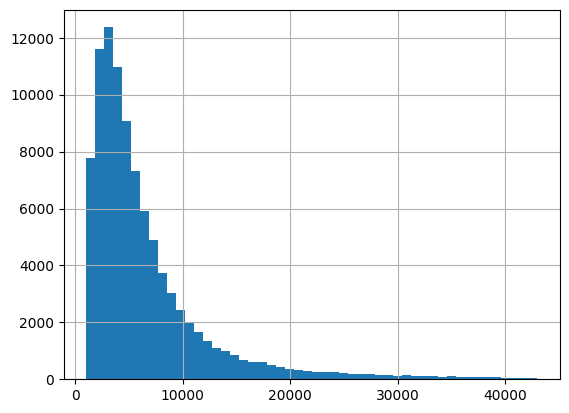

In [53]:
# Filter for open trading hours (e.g., 09:30 to 16:00)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_trading = df[df['timestamp'].dt.time.between(pd.to_datetime('09:30').time(), pd.to_datetime('16:00').time())].sort_values('timestamp')

df_trading.head()
# Plot a histogram of the 'volume' column after removing outliers (e.g., outside 1st and 99th percentiles)
lower = df_trading['volume'].quantile(0.02)
upper = df_trading['volume'].quantile(0.98)
vol_no_outliers = df_trading[(df_trading['volume'] >= lower) & (df_trading['volume'] <= upper)]['volume']
vol_no_outliers.hist(bins=50)


In [ ]:
# Bin the volume data into 8 even categories (quantiles)
vol_bins = pd.qcut(vol_no_outliers, 8, labels=[f'Q{i+1}' for i in range(8)])

# Show the count of samples in each bin
print(vol_bins.value_counts().sort_index())

df_trading.loc[vol_no_outliers.index, 'volume_category'] = vol_bins
df_trading.head()

volume
Q1    11779
Q2    11757
Q3    11768
Q4    11764
Q5    11766
Q6    11760
Q7    11762
Q8    11765
Name: count, dtype: int64


,timestamp,open,high,low,close,volume,log_return,volume_category
59792,2024-01-02 09:30:00,155.0549,155.4929,155.0549,155.2834,88110,0.000736,NaN
59791,2024-01-02 09:31:00,155.2263,155.2263,154.9882,155.1691,11952,0.000000,Q8
59790,2024-01-02 09:32:00,155.1596,155.2263,155.1215,155.1691,7685,0.000337,Q6
59789,2024-01-02 09:33:00,155.1406,155.1406,155.0358,155.1168,7479,-0.000337,Q6
59788,2024-01-02 09:34:00,155.1120,155.1787,155.0787,155.1691,4440,0.000491,Q4


<Axes: >

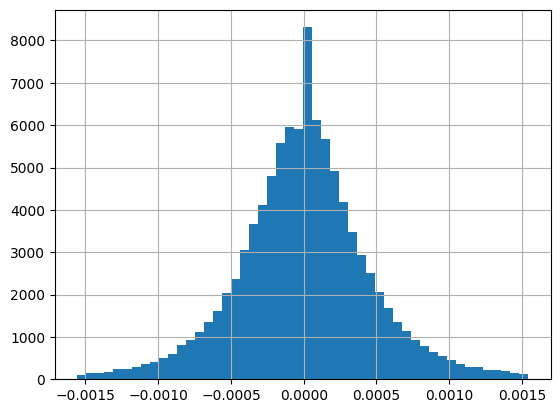

In [ ]:
lower = df_trading['log_return'].quantile(0.01)
upper = df_trading['log_return'].quantile(0.99)
log_no_outliers = df_trading[(df_trading['log_return'] >= lower) & (df_trading['log_return'] <= upper)]['log_return']
log_no_outliers.hist(bins=50)

In [62]:
ret_bins = pd.qcut(vol_no_outliers, 8, labels=[f'R{i+1}' for i in range(8)])

# Show the count of samples in each bin
print(ret_bins.value_counts().sort_index())

df_trading.loc[log_no_outliers.index, 'return_cat'] = ret_bins
df_trading.head()

volume
R1    11779
R2    11757
R3    11768
R4    11764
R5    11766
R6    11760
R7    11762
R8    11765
Name: count, dtype: int64


,timestamp,open,high,low,close,volume,log_return,volume_category,return_cat
59792,2024-01-02 09:30:00,155.0549,155.4929,155.0549,155.2834,88110,0.000736,NaN,NaN
59791,2024-01-02 09:31:00,155.2263,155.2263,154.9882,155.1691,11952,0.000000,Q8,R8
59790,2024-01-02 09:32:00,155.1596,155.2263,155.1215,155.1691,7685,0.000337,Q6,R6
59789,2024-01-02 09:33:00,155.1406,155.1406,155.0358,155.1168,7479,-0.000337,Q6,R6
59788,2024-01-02 09:34:00,155.1120,155.1787,155.0787,155.1691,4440,0.000491,Q4,R4


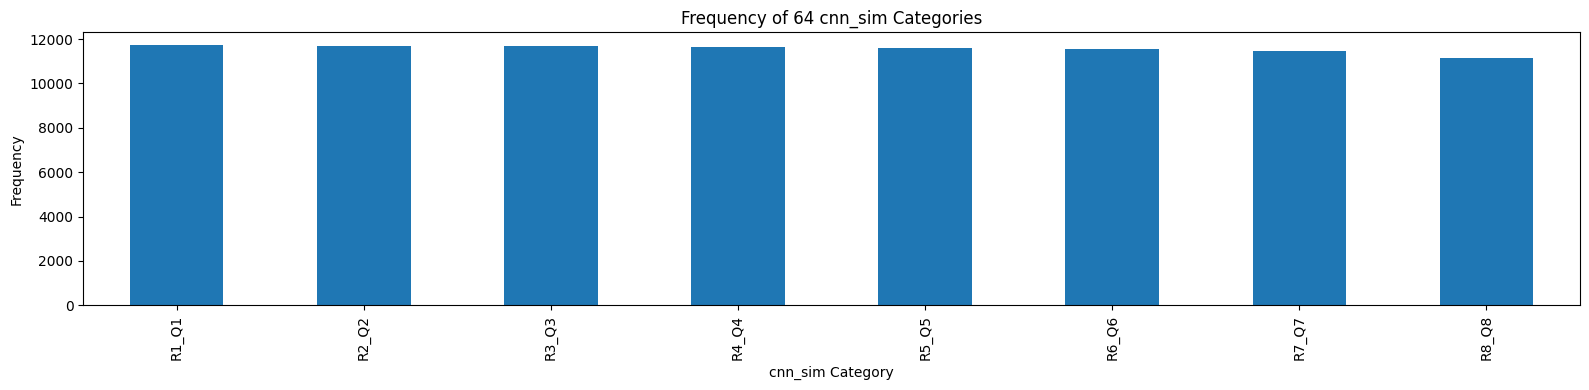

In [77]:
df_trading = df_trading.dropna()
df_trading['cnn_sim'] = df_trading['return_cat'].astype(str) + '_' + df_trading['volume_category'].astype(str)
df_trading['cnn_sim'] = df_trading['cnn_sim'].astype('category')

import matplotlib.pyplot as plt

df_trading['cnn_sim'].value_counts().sort_index().plot(kind='bar', figsize=(16, 4))
plt.xlabel('cnn_sim Category')
plt.ylabel('Frequency')
plt.title('Frequency of 64 cnn_sim Categories')
plt.tight_layout()
plt.show()

In [78]:
df_trading

,timestamp,open,high,low,close,volume,log_return,volume_category,return_cat,cnn_sim
59791,2024-01-02 09:31:00,155.2263,155.2263,154.9882,155.1691,11952,0.000000,Q8,R8,R8_Q8
59790,2024-01-02 09:32:00,155.1596,155.2263,155.1215,155.1691,7685,0.000337,Q6,R6,R6_Q6
59789,2024-01-02 09:33:00,155.1406,155.1406,155.0358,155.1168,7479,-0.000337,Q6,R6,R6_Q6
59788,2024-01-02 09:34:00,155.1120,155.1787,155.0787,155.1691,4440,0.000491,Q4,R4,R4_Q4
59787,2024-01-02 09:35:00,155.0739,155.1311,154.9787,155.0930,8446,0.000123,Q7,R7,R7_Q7
...,...,...,...,...,...,...,...,...,...,...
124745,2024-12-31 15:54:00,216.6926,216.8752,216.6926,216.7469,16399,0.001230,Q8,R8,R8_Q8
124744,2024-12-31 15:55:00,216.6778,216.6877,216.3522,216.4805,30575,-0.001162,Q8,R8,R8_Q8
124743,2024-12-31 15:56:00,216.4854,216.8150,216.4509,216.7321,35182,-0.001024,Q8,R8,R8_Q8
124742,2024-12-31 15:57:00,216.6680,216.9541,216.6285,216.9541,25000,0.000705,Q8,R8,R8_Q8


In [81]:
# Split df_trading into validation and test sets (e.g., 80% validation, 20% test)
val_size = int(len(df_trading) * 0.8)
df_train = df_trading.iloc[:val_size]
df_test = df_trading.iloc[val_size:]

print(f"Training set size: {len(df_train)}")
print(f"Test set size: {len(df_test)}")

Training set size: 74009
Test set size: 18503


In [87]:
with open('to_words.txt', 'w') as f:
    for entry in df_train['cnn_sim']:
        f.write(f"{entry}\n")

In [85]:
vocab = [f"R{i}_Q{j}" for i in range(1, 9) for j in range(1, 9)]
print(vocab)

['R1_Q1', 'R1_Q2', 'R1_Q3', 'R1_Q4', 'R1_Q5', 'R1_Q6', 'R1_Q7', 'R1_Q8', 'R2_Q1', 'R2_Q2', 'R2_Q3', 'R2_Q4', 'R2_Q5', 'R2_Q6', 'R2_Q7', 'R2_Q8', 'R3_Q1', 'R3_Q2', 'R3_Q3', 'R3_Q4', 'R3_Q5', 'R3_Q6', 'R3_Q7', 'R3_Q8', 'R4_Q1', 'R4_Q2', 'R4_Q3', 'R4_Q4', 'R4_Q5', 'R4_Q6', 'R4_Q7', 'R4_Q8', 'R5_Q1', 'R5_Q2', 'R5_Q3', 'R5_Q4', 'R5_Q5', 'R5_Q6', 'R5_Q7', 'R5_Q8', 'R6_Q1', 'R6_Q2', 'R6_Q3', 'R6_Q4', 'R6_Q5', 'R6_Q6', 'R6_Q7', 'R6_Q8', 'R7_Q1', 'R7_Q2', 'R7_Q3', 'R7_Q4', 'R7_Q5', 'R7_Q6', 'R7_Q7', 'R7_Q8', 'R8_Q1', 'R8_Q2', 'R8_Q3', 'R8_Q4', 'R8_Q5', 'R8_Q6', 'R8_Q7', 'R8_Q8']
